In [3]:
import pandas as pd
import laspy

import requests

from dotenv import dotenv_values

/Users/vaii/Home/Projects/openaitoz/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [6]:
config = dotenv_values()

In [7]:
## Get a tile from openTopopgraphy

opentop_endpoint = "https://portal.opentopography.org/API/globaldem"

params = {
    "demtype": "AW3D30",
    "south": 24.401,
    "north": 24.444,
    "west": 76.261076,
    "east": 76.294076,
    "API_Key": config['OPENTOPOGRAPHY_KEY']
}

def call_openTopography():
    response = requests.get(opentop_endpoint, params=params)
    return response

In [8]:
response = call_openTopography()

In [9]:
response

<Response [200]>

In [10]:
response.content

b'II*\x00\xc0\x00\x00\x00GDAL_STRUCTURAL_METADATA_SIZE=000140 bytes\nLAYOUT=IFDS_BEFORE_DATA\nBLOCK_ORDER=ROW_MAJOR\nBLOCK_LEADER=SIZE_AS_UINT4\nBLOCK_TRAILER=LAST_4_BYTES_REPEATED\nKNOWN_INCOMPATIBLE_EDITION=NO\n \x00\x12\x00\x00\x01\x03\x00\x01\x00\x00\x00w\x00\x00\x00\x01\x01\x03\x00\x01\x00\x00\x00\x9b\x00\x00\x00\x02\x01\x03\x00\x01\x00\x00\x00\x10\x00\x00\x00\x03\x01\x03\x00\x01\x00\x00\x00\x05\x00\x00\x00\x06\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x15\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1c\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00=\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00B\x01\x03\x00\x01\x00\x00\x00\x00\x01\x00\x00C\x01\x03\x00\x01\x00\x00\x00\x00\x01\x00\x00D\x01\x04\x00\x01\x00\x00\x00B\x02\x00\x00E\x01\x04\x00\x01\x00\x00\x00\x1c/\x00\x00S\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00\x0e\x83\x0c\x00\x03\x00\x00\x00\x9e\x01\x00\x00\x82\x84\x0c\x00\x06\x00\x00\x00\xb6\x01\x00\x00\xaf\x87\x03\x00 \x00\x00\x00\xe6\x01\x00\x00\xb0\x87\x0c\x00\x02\x00\x00\x00&\x0

In [11]:
# response = requests.get(f"https://portal.opentopography.org/API/globaldem?demtype=NASADEM&south=45.196&north=49&west=-122.66&east=-119.95&outputFormat=GTiff&API_Key={config['OPENTOPOGRAPHY_KEY']}")

In [12]:
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [13]:
# response.text

In [14]:
with open(f"data/test_1.tif", 'wb') as f:
    f.write(response.content)

In [15]:
## Viz data
import rasterio
from rasterio.plot import show as show_rasterio

In [16]:
image = rasterio.open(f"data/test_1.tif", driver="GTiff", )

In [17]:
response.headers

{'Date': 'Tue, 03 Jun 2025 12:35:01 GMT', 'Server': 'Apache', 'Content-Disposition': 'attachment; filename=appRasterSelectAPIService1748954101194284159020.tif', 'Access-Control-Allow-Origin': '*', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Transfer-Encoding': 'chunked', 'Content-Type': 'application/octet-stream'}

In [18]:
show_rasterio(image)

ImportError: Could not import matplotlib
matplotlib required for plotting functions

In [280]:
image.height

155

In [281]:
import matplotlib.pyplot as plt

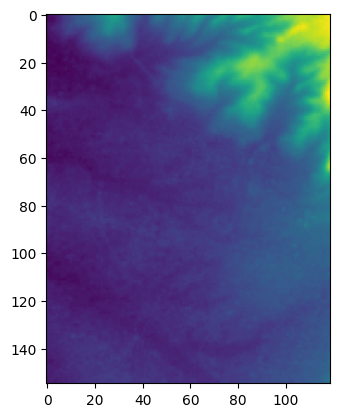

In [284]:
plt.imshow(image.read(1))